In [87]:
from transformers import CLIPImageProcessor, CLIPModel
import torch
from torch.utils.data import ConcatDataset
import torchvision
import torchvision.transforms.v2 as transforms
import numpy as np


In [13]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
image_processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [82]:
processing_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


set1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       #download=True, transform=transforms.ToTensor())
                                       download=True, transform=processing_transform)

set2 = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          #download=True, transform=transforms.ToTensor())
                                          download=True, transform=processing_transform)

            
unified_dataset = ConcatDataset([set1, set2])


/data/marci/mjakowsk/miniconda3/envs/eds4ai/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


(32, 32, 3)
torch.Size([3, 32, 32])
1


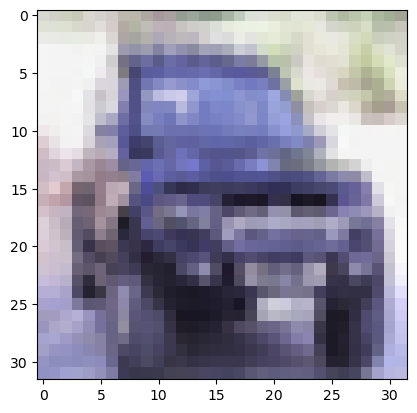

In [103]:
data1 = set1.data
data2 = set2.data
images = np.append(data1,data2, axis=0)

targets1 = set1.targets
targets2 = set2.targets
labels = targets1 + targets2

#print(len(targets1 + targets2))
#print(set1.__dict__)
#print((set1[2][0]).shape)

import matplotlib.pyplot as plt

index = 9
img = images[index + 50000]
print(img.shape)
print(set2[index][0].shape)
#permuted_img = (img.transpose((1, 2, 0)))
plt.imshow(img)
print(labels[index+50000])

In [1]:
import glob
from Helper_Functions import create_unified_cifar10_dataset

In [2]:

fns = create_unified_cifar10_dataset()
print(fns)

<class 'list'>
['./data/cifar-10-batches-py/data_batch_4', './data/cifar-10-batches-py/data_batch_3', './data/cifar-10-batches-py/data_batch_2', './data/cifar-10-batches-py/data_batch_5', './data/cifar-10-batches-py/data_batch_1', 'test_batch']
